### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from dython.nominal import associations

/Users/krystaljackson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/krystaljackson/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')
# create a seperate dataframe in case we need to revert back to the orginal data 
df = data

In [4]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [7]:
df['car'].unique()
# this column does not seem to supply interesting or important data and has the most missingness

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

3. Decide what to do about your missing data -- drop, replace, other...

We will drop the missing values for each we investigat further or we deal with missingness 
by replacing the values as appropriate. We will not use the 'car' column in combination with others 
due to missingness and non-representativeness of our sample population. 


4. What proportion of the total observations chose to accept the coupon? 



In [8]:
coupon_accepted = (df['Y'] == 1).sum() / len(df)

In [9]:
coupon_accepted
# approximately 57% chose to accept the coupon

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Count of Coupons by Type')

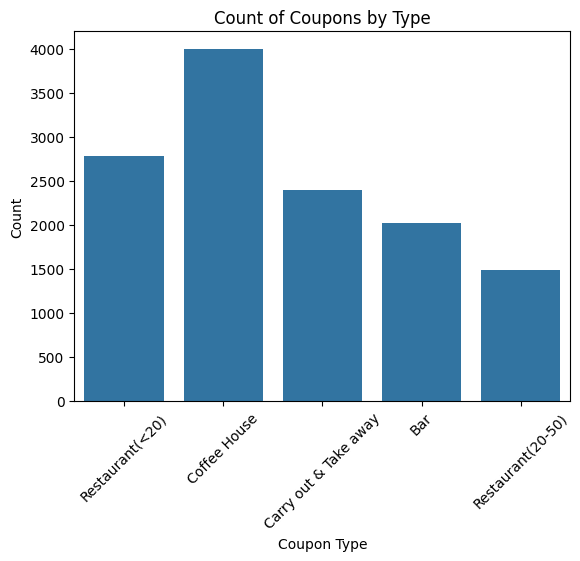

In [36]:
sns.countplot(data=df, x='coupon')
plt.xticks(rotation=45)

plt.xlabel('Coupon Type') 
plt.ylabel('Count')  
plt.title('Count of Coupons by Type')  

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Count of Temperature at Time of Offer')

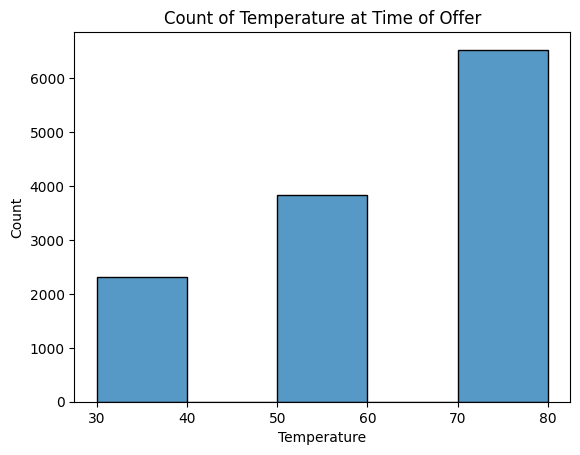

In [13]:
sns.histplot(data=df, x='temperature', bins=5)

plt.xlabel('Temperature')
plt.ylabel('Count') 
plt.title('Count of Temperature at Time of Offer') 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
df_bar = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [15]:
bar_coupons_yes = (df_bar['Y'] == 1).sum() / len(df_bar)

In [16]:
bar_coupons_yes
# approximately 41% of the bar coupons offered were accepted

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
df_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [18]:
bar_yes_3orless = (df_bar['Bar'].isin(['never', 'less1', '1~3']) & (df_bar["Y"] == 1)).sum() / len(df_bar)
bar_yes_4ormore = (df_bar['Bar'].isin(['gt8', '4~8']) & (df_bar["Y"] == 1)).sum() / len(df_bar)

In [19]:
print(bar_yes_3orless, bar_yes_4ormore)
# for those who went 3 or fewer times month, approx 33% accepted the coupon
# for those who went 4 or more times a month, approx 8% accepted the coupon 

0.330193356470005 0.07585523054040655


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
once_or_more = df_bar[df_bar['Bar'].isin(['1~3', 'gt8', '4~8'])]

# Filter further for drivers over the age of 25
drinking_and_25 = once_or_more[(once_or_more['age'] > str(25))]

# Calculate acceptance rate for drivers who go to a bar more than once a month and are over 25
acceptance_rate_drinking_and_25 = drinking_and_25['Y'].mean()

# Calculate acceptance rate for all others
all_others = df_bar[~df_bar.index.isin(drinking_and_25.index)]  # Select rows not in drinking_and_25
acceptance_rate_all_others = all_others['Y'].mean()

In [37]:
print(acceptance_rate_drinking_and_25, acceptance_rate_all_others)

NameError: name 'acceptance_rate_drinking_and_25' is not defined

There is a difference between drivers who go to a bar more than once a month and are over the 
age of 25 to the all others. This may be due to the fact that the drinking age is 21, so less people can 
use the coupons, coupled with the fact that younger people today are drinking less than previous generations. 

Text(0.5, 1.0, 'Count of bar coupon acceptance for drivers who go to a bar more than once a month and are over the age of 25')

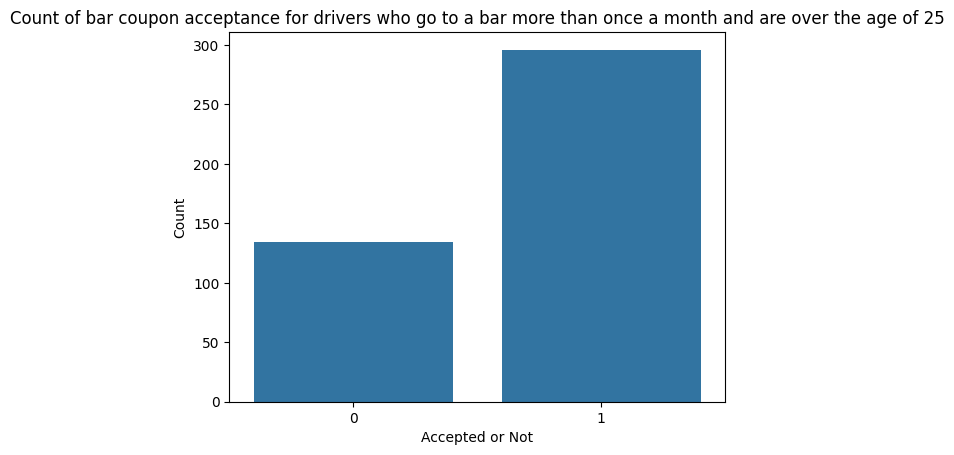

In [24]:
fig1 = sns.countplot(data=drinking_and_25, x='Y')

plt.xlabel('Accepted or Not')
plt.ylabel('Count')  # Adding y-axis label
plt.title('Count of bar coupon acceptance for drivers who go to a bar more than once a month and are over the age of 25')


Text(0.5, 1.0, 'Count of bar coupon acceptance for all others')

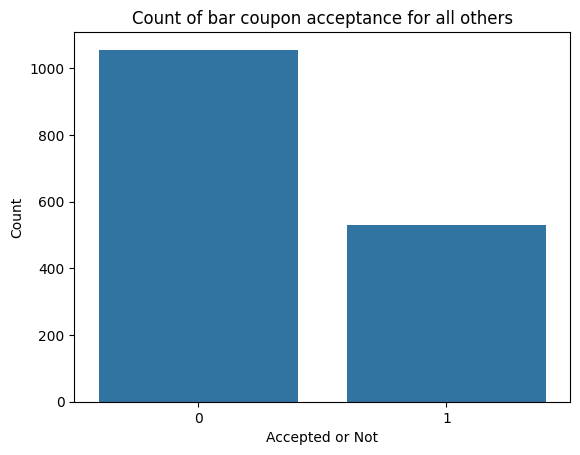

In [25]:
fig2 = sns.countplot(data=all_others, x='Y')

plt.xlabel('Accepted or Not')
plt.ylabel('Count')  # Adding y-axis label
plt.title('Count of bar coupon acceptance for all others')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [26]:
df["passanger"].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [27]:
df["occupation"].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [28]:
once_or_more = df_bar[df_bar['Bar'].isin(['1~3', 'gt8', '4~8'])]

# Filter further for drivers who had passengers that were not a kid
drinking_and_nokid = once_or_more[(once_or_more['passanger'] != 'Kid(s)')]

# Filter further for drivers who had occupations other than farming, fishing, or forestry
never_outside = drinking_and_nokid[(~drinking_and_nokid['occupation'].isin(['farming', 'fishing', 'forestry']))]

# Calculate acceptance rate for drivers who drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
acceptance_rate_new = never_outside['Y'].mean()

# Calculate acceptance rate for all others
all_others = df_bar[~df_bar.index.isin(never_outside.index)]  # Select rows not in the aboce dataframe
acceptance_rate_all_others = all_others['Y'].mean()

In [29]:
print(acceptance_rate_new, acceptance_rate_all_others)

0.7132486388384754 0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [38]:
# go to bars more than once a month and are under the age of 30
once_or_more = df_bar[df_bar['Bar'].isin(['1~3', 'gt8', '4~8'])]

# Filter further for drivers over the age of 25
drinking_and_30 = once_or_more[(once_or_more['age'] < str(30))]

# Calculate acceptance rate for drivers who go to a bar more than once a month and are over 30
acceptance_rate_drinking_and_30 = drinking_and_30['Y'].mean()

# Calculate acceptance rate for all others
all_others = df_bar[~df_bar.index.isin(drinking_and_30.index)]  # Select rows not in drinking_and_30
acceptance_rate_all_others = all_others['Y'].mean()


NameError: name 'df_bar' is not defined

In [31]:
print(acceptance_rate_drinking_and_30, acceptance_rate_all_others)

0.6883720930232559 0.3460166468489893


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Findings pt 1
Comparing the results from looking at (1) drivers who go to a bar more than once a month and are over the age of 25
and (2) drivers that go to bars more than once a month and are under the age of 30 we see a similar acceptance rate of the bar coupon. Similarly, drivers that go to bars more than once a month, had passengers that were not a kid, 
and had occupations other than farming, fishing, or forestry has a similar acceptance rate. Although some of 
these variables would need to be seperated and tested independetly, it appears based on these tests alone that
if someone goes to a bar more than once a month and is in a position to be able to drink (legally of age, and 
does not have a kid in the car at the time) they are likely to accept the bar coupon. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Method
First we want to understand what variables have a relationship with one another. Many of the variables are categorical so we import the dython library to handle those. The goal will be to find what demographic factors are most strongly asscoiated with accepting a coupon. These are things that are not circumstantial (time of day, where they are going) and therefore do not change as much or as often. This will help create different personas or profiles for targeting coupons to the folks that are most likely to accept them. Once this is known we can then look at circumstantial factors that lead to coupon acceptance and optimize to send coupons to individuals that are most likely to take them in our later machine learning applications. 


/Users/krystaljackson/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
/Users/krystaljackson/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)
/Users/krystaljackson/opt/anaconda3/lib/python3.9/site-packages/dython/nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly

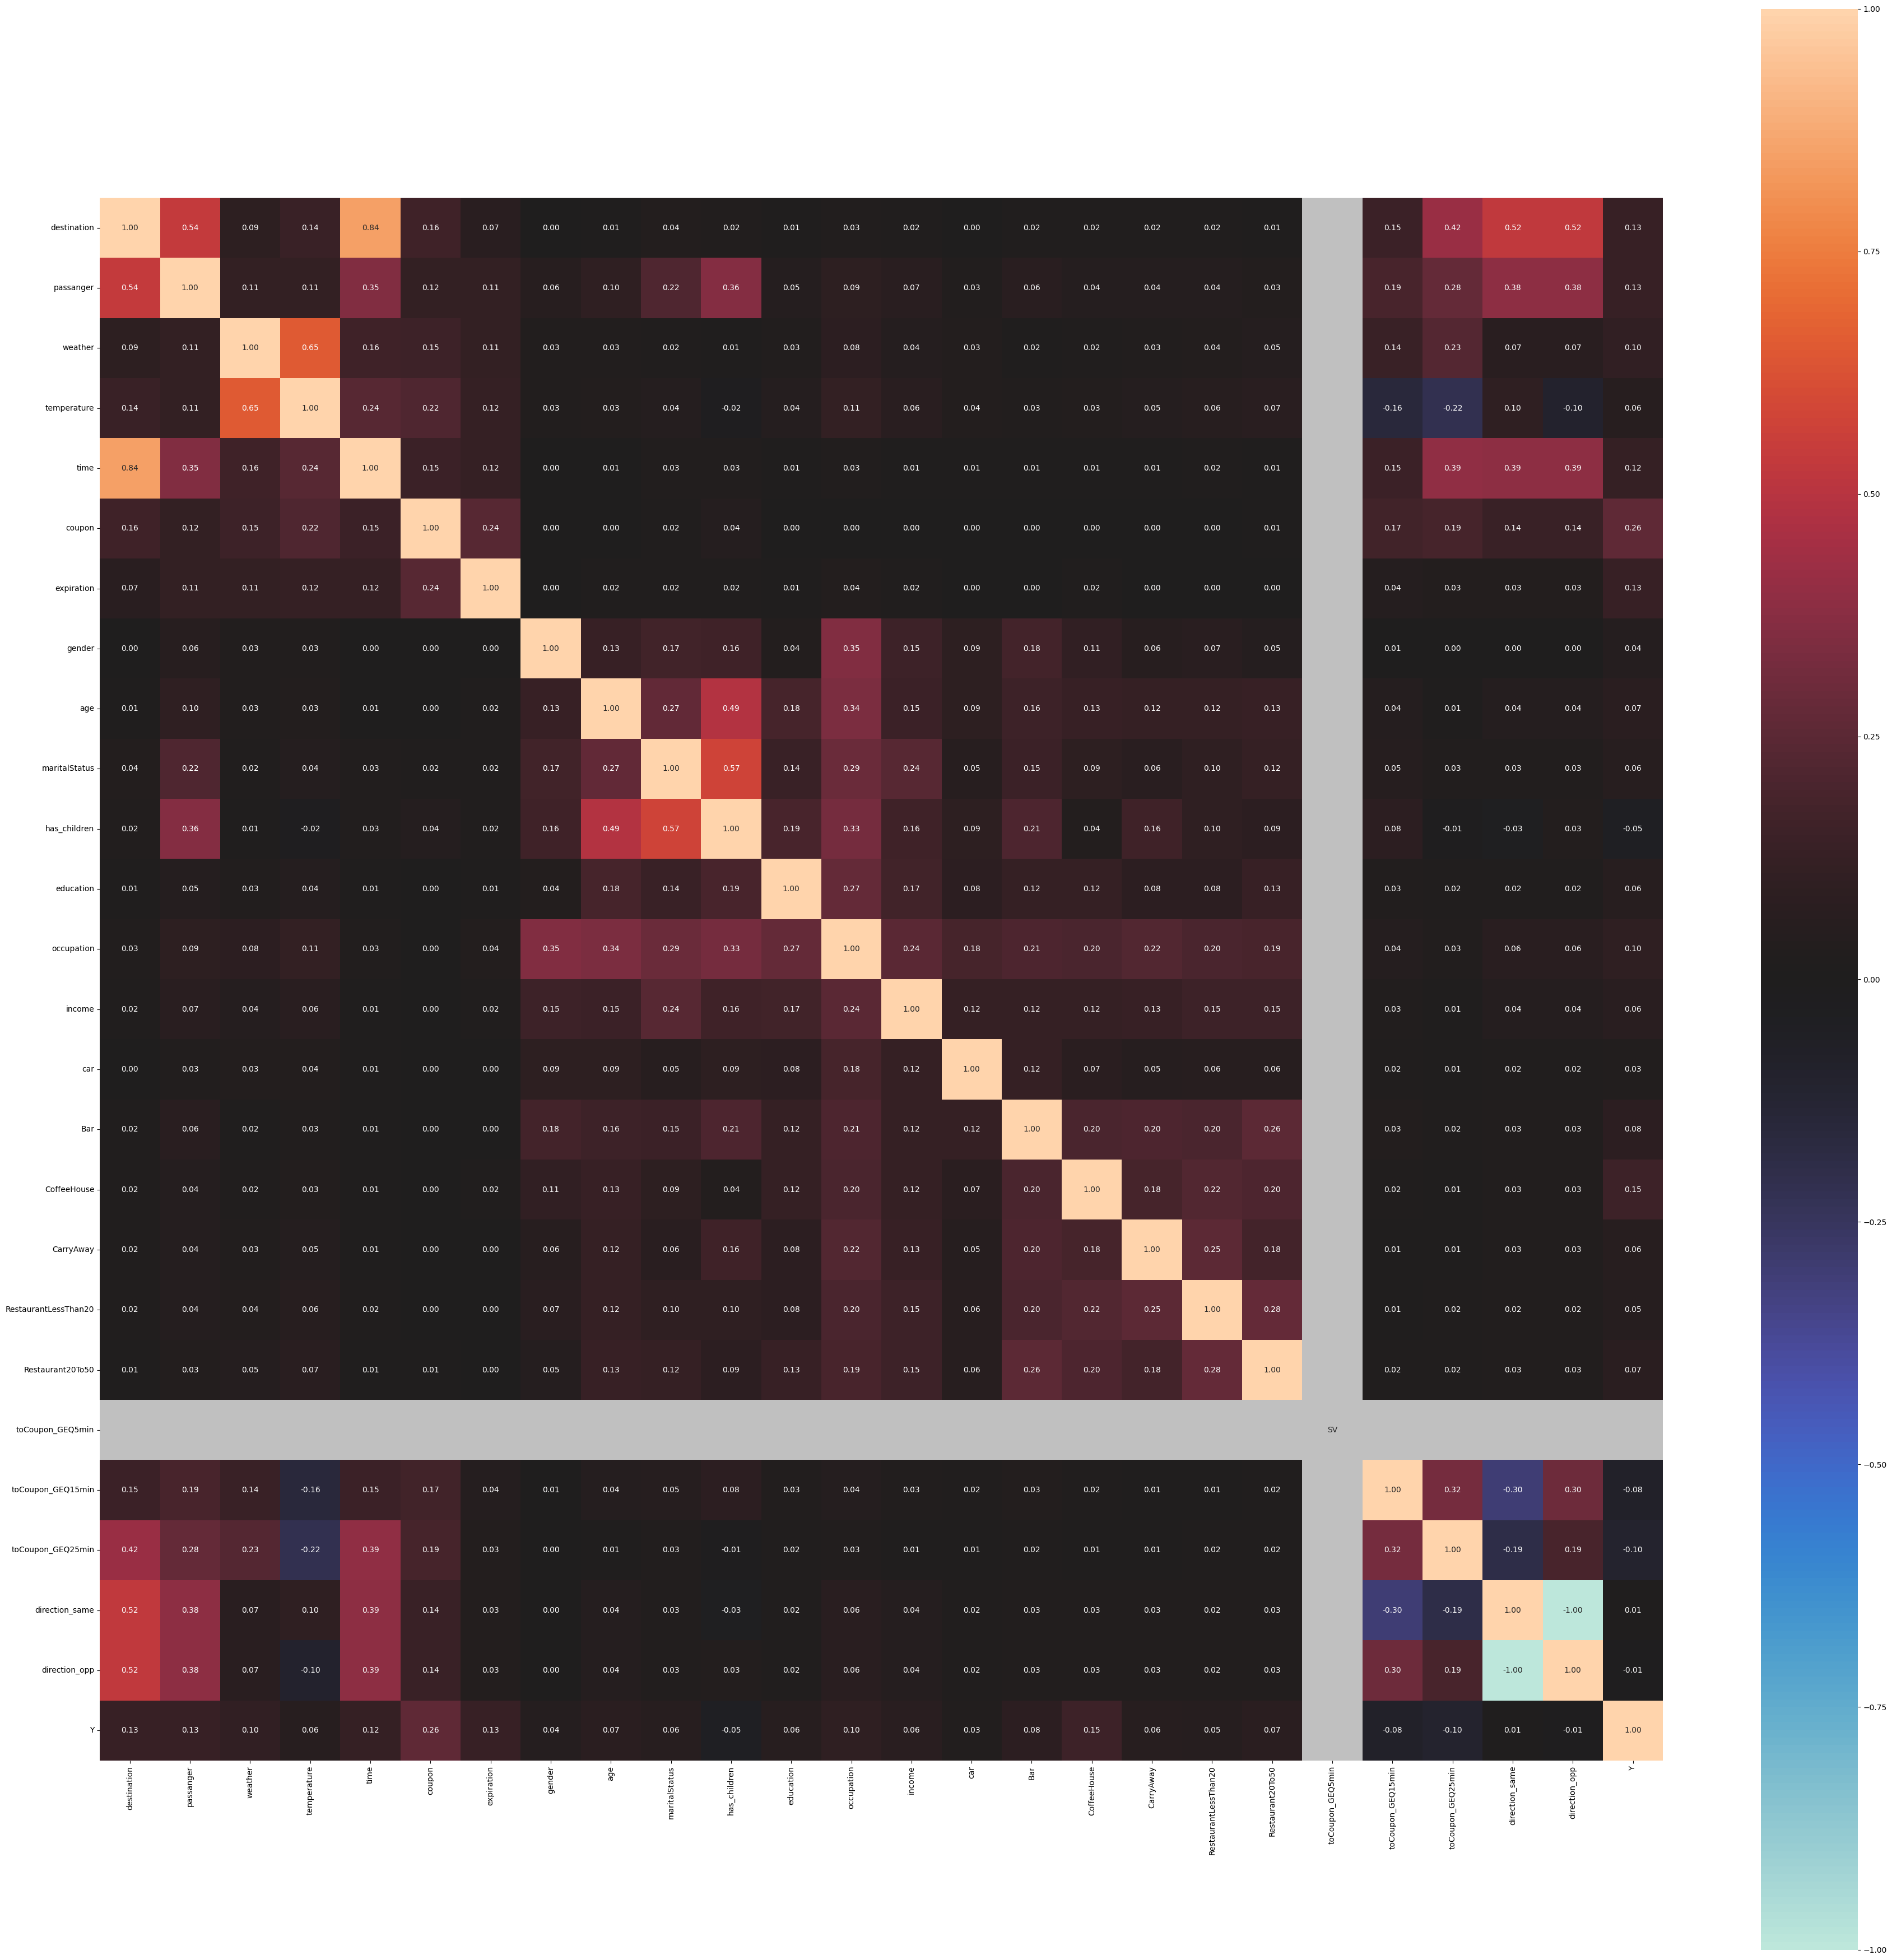

In [40]:
complete_correlation = associations(df, filename= 'complete_correlation.png', figsize=(45,45))

An interesting result from this table is occupation has a strong asociation with accepting a coupon than income 
and is one of the strongest demographic variables associated with accepting a coupon (compared to gender, age, etc.). We will explore this variable further. 

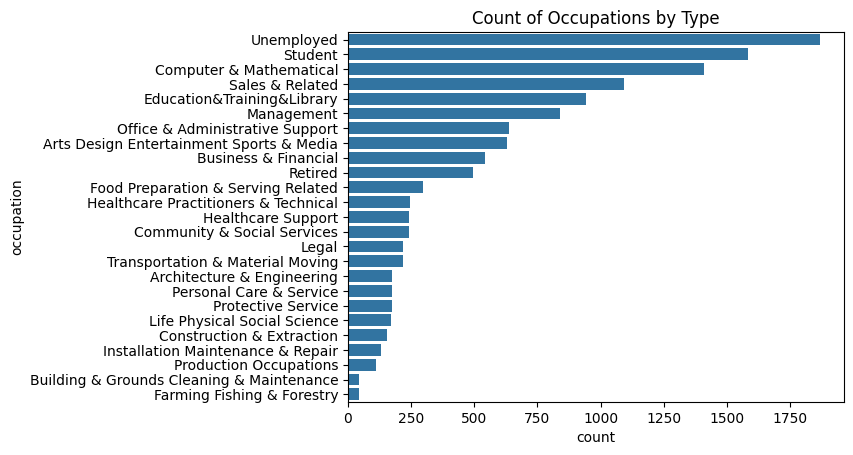

In [47]:
fig_occ = sns.countplot(df['occupation'], order=df['occupation'].value_counts().index)
# plt.xticks(rotation=90)
plt.title('Count of Occupations by Type')
plt.show();

In [34]:
prop_accepted = df.groupby('occupation')['Y'].apply(lambda x: sum(x) / len(x)).sort_values(ascending=False)

In [35]:
prop_accepted

occupation
Healthcare Support                           0.698347
Construction & Extraction                    0.688312
Healthcare Practitioners & Technical         0.676230
Protective Service                           0.645714
Architecture & Engineering                   0.634286
Production Occupations                       0.618182
Student                                      0.610480
Office & Administrative Support              0.600939
Transportation & Material Moving             0.596330
Building & Grounds Cleaning & Maintenance    0.590909
Management                                   0.588305
Food Preparation & Serving Related           0.583893
Life Physical Social Science                 0.576471
Business & Financial                         0.569853
Computer & Mathematical                      0.566761
Sales & Related                              0.562672
Personal Care & Service                      0.548571
Unemployed                                   0.548128
Farming Fishing &

### Our top three occupations that accept coupons are:
Healthcare Support:                           0.698347 <br>
Construction & Extraction:                    0.688312 <br>
Healthcare Practitioners & Technical:         0.676230 <br>

The next variable that influences coupon acceptance is age, we will look at different age groups within our two three occupations to see how much more likely they are to accept a coupon than their counter parts. 

Text(0.5, 1.0, 'Count of Age')

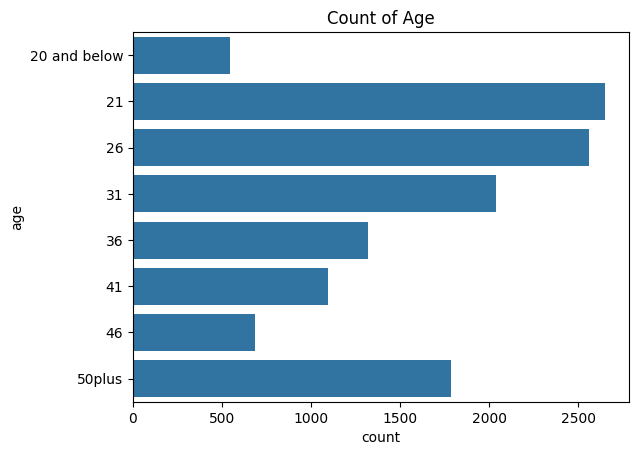

In [11]:
df['age'] = df['age'].replace('below21', '20 and below') # rename so the sorting works correctly
sorted_values = sorted(df['age'])
sns.countplot(df['age'], order=sorted_values)
plt.title('Count of Age')

#alternative way of visualizing by highest count 
# fig_age = sns.countplot(df['age'], order=df['age'].value_counts().index)
# # plt.xticks(rotation=90)
# plt.title('Count of Age')
# plt.show();

In [24]:
df_age_topjobs = df[df['occupation'].isin(['Healthcare Support', 'Construction & Extraction', 'Healthcare Practitioners & Technical'])]

Text(0.5, 1.0, 'Count of Age by Occupation')

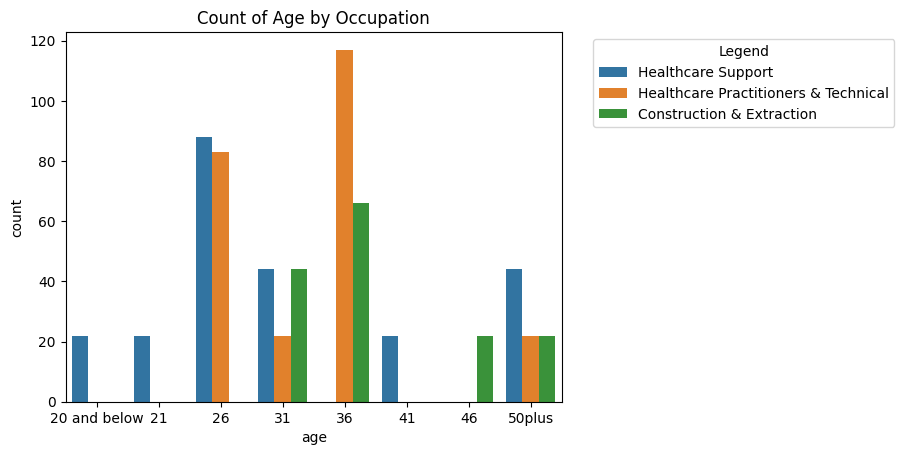

In [20]:
sns.countplot(data=df_age_topjobs, x='age', hue='occupation', order=sorted_values)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Count of Age by Occupation')

In [21]:
# the largest group is 36 year olds who work in healthcare as practitioners and techincal roles, 
# let's see how this group differs from the other top three occupations that accept coupons 

In [25]:
# say yes to coupons, work in healthcare p&t and are 36
healthcare_36 = df_age_topjobs[df_age_topjobs['age'] == str(36)]

healthcare_36 = healthcare_36[healthcare_36['occupation'] == 'Healthcare Practitioners & Technical']

# Calculate acceptance rate for drivers who go to a bar more than once a month and are over 30
acceptance_rate_healthcare_36 = healthcare_36['Y'].mean()

# Calculate acceptance rate for all others
all_others = df_age_topjobs[~df_age_topjobs.index.isin(healthcare_36.index)]  # Select rows not in drinking_and_30
acceptance_rate_all_others = all_others['Y'].mean()

In [27]:
print(acceptance_rate_healthcare_36, acceptance_rate_all_others)

0.6923076923076923 0.6864244741873805


We can see this subgroup does not have a significant difference in the acceptance of coupons compared to other groups

Text(0.5, 1.0, 'Count of Coupon Acceptance by Age for Practitioners & Technical Healthcare Workers')

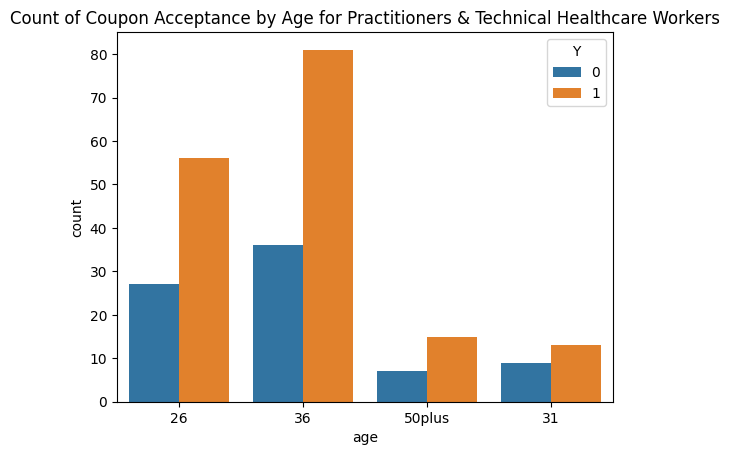

In [36]:
filtered_df = df[df['occupation'] == 'Healthcare Practitioners & Technical']
sns.countplot(data=filtered_df, x='age', hue='Y')
plt.title('Count of Coupon Acceptance by Age for Practitioners & Technical Healthcare Workers')

This visual drive this point home, among the top occupation that accepts coupons, there is not a significant difference in acceptance by age.

### Findings pt 2


We found that occupation had one of the highest correlations with accepting coupons compared to other demographic features. We then found the top three occupations that accepted coupons, and from there investigated one subgroup, 36 year old practitioners and technical healthcare workers. We found that this subgroup did not have a significant difference in coupon acceptance compared to other individuals in the top three occupations. 

### Next steps and recommendations


From here our analysis should focus on finding subpopulations within the top three occupations that accepted coupons at the highest rates and what types of coupons they accepted. From there we can target coupons to particular subgroups with the highest rates of acceptance. 